<a href="https://colab.research.google.com/github/nbilasals/sentiment-qris/blob/main/sentiment_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# !pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 92.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.2 MB/s eta 0:00:00


In [3]:
# from transformers import pipeline
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# pretrained= "mdhugol/indonesia-bert-sentiment-classification"

# model = AutoModelForSequenceClassification.from_pretrained(pretrained)
# tokenizer = AutoTokenizer.from_pretrained(pretrained)

# sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

# pos_text = "Sangat bahagia hari ini"
# neg_text = "Dasar anak sialan!! Kurang ajar!!"

# result = sentiment_analysis(pos_text)
# status = label_index[result[0]['label']]
# score = result[0]['score']
# print(f'Text: {pos_text} | Label : {status} ({score * 100:.3f}%)')

# result = sentiment_analysis(neg_text)
# status = label_index[result[0]['label']]
# score = result[0]['score']
# print(f'Text: {neg_text} | Label : {status} ({score * 100:.3f}%)')


Text: Sangat bahagia hari ini | Label : positive (99.481%)
Text: Dasar anak sialan!! Kurang ajar!! | Label : negative (99.828%)


In [16]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('QRIS.csv')
df

,Komentar
0,QRIS membuat pembayaran menjadi mudah!
1,Saya senang bagaimana QRIS menyederhanakan tra...
2,QRIS adalah inovasi luar biasa untuk bisnis di...
3,"Penggunaan QRIS seringkali membingungkan, seri..."
4,Sistem QRIS terlalu lambat. Saya tidak suka.
...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...
96,Penggunaan QRIS membuat pembelian menjadi lebi...
97,QRIS ribet
98,Tidak jelas make QRIS


In [9]:
#Initialize the sentiment analysis pipeline with the pre-trained model and tokenize

pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)


In [10]:
#Define a function to apply sentiment analysis to the DataFrame

def analyze_sentiment(text):
    result = sentiment_analysis(text)
    status = label_index[result[0]['label']]
    score = result[0]['score']
    return status, score

In [12]:
df[['Sentiment', 'Score']] = df['Komentar'].apply(lambda x: pd.Series(analyze_sentiment(x)))

In [13]:
df

,Komentar,Sentiment,Score
0,QRIS membuat pembayaran menjadi mudah!,positive,0.953199
1,Saya senang bagaimana QRIS menyederhanakan tra...,positive,0.937658
2,QRIS adalah inovasi luar biasa untuk bisnis di...,positive,0.970795
3,"Penggunaan QRIS seringkali membingungkan, seri...",negative,0.988223
4,Sistem QRIS terlalu lambat. Saya tidak suka.,negative,0.997994
...,...,...,...
95,QRIS adalah jawaban bagi mereka yang mencari k...,neutral,0.992658
96,Penggunaan QRIS membuat pembelian menjadi lebi...,positive,0.872804
97,QRIS ribet,negative,0.997216
98,Tidak jelas make QRIS,negative,0.997648


In [19]:
# Count sentiment occurrences
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

neutral     57
positive    29
negative    14
Name: Sentiment, dtype: int64

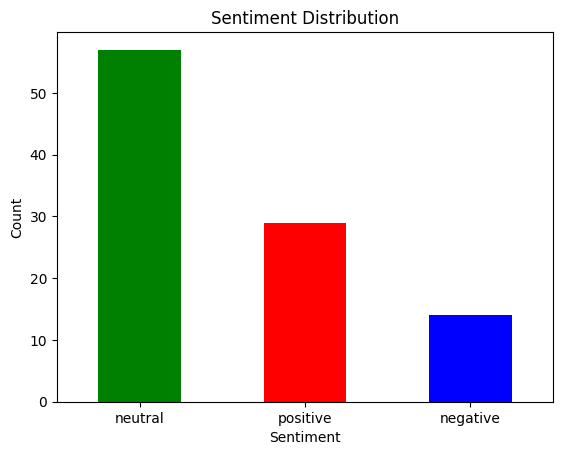

In [20]:
# Create a bar chart to visualize sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

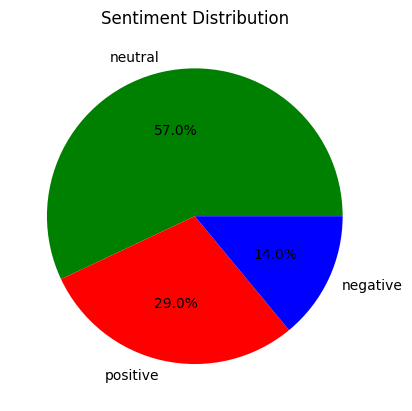

In [21]:
# Create a pie chart to visualize sentiment distribution
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [22]:
df[df['Sentiment'] == 'negative']

,Komentar,Sentiment,Score
3,"Penggunaan QRIS seringkali membingungkan, seri...",negative,0.988223
4,Sistem QRIS terlalu lambat. Saya tidak suka.,negative,0.997994
5,QRIS tidak dapat diandalkan dan seringkali ber...,negative,0.994015
6,Saya memiliki pandangan campuran tentang QRIS....,negative,0.989141
8,Saya skeptis tentang keamanan QRIS.,negative,0.994808
13,Saya tidak merasa aman dengan keamanan QRIS.,negative,0.996508
17,Saya tidak bisa lagi membayangkan hidup tanpa ...,negative,0.989080
18,QRIS mengalami terlalu banyak masalah teknis.,negative,0.961570
25,Saya kesal dengan ketidakstabilan QRIS.,negative,0.996665
63,Saya tidak suka ketidakpastian dalam penggunaa...,negative,0.946388


In [24]:
df[df['Sentiment'] == 'neutral']

,Komentar,Sentiment,Score
9,QRIS perlu meningkatkan dukungan pelanggan.,neutral,0.994640
12,QRIS telah memudahkan pembayaran non-tunai.,neutral,0.966314
14,QRIS telah merevolusi pembayaran digital.,neutral,0.981832
15,Saya berharap QRIS memiliki lebih banyak fitur...,neutral,0.991702
20,QRIS adalah terobosan dalam pembayaran digital.,neutral,0.952718
21,QRIS adalah solusi untuk masa depan.,neutral,0.767330
24,QRIS adalah alat yang berguna untuk pelaku bis...,neutral,0.983404
26,QRIS adalah langkah penting menuju ekonomi dig...,neutral,0.988983
28,QRIS membantu kita menghindari uang tunai.,neutral,0.974701
29,Saya menantikan pengembangan lebih lanjut dari...,neutral,0.992794
